# Código útilizado para el curso: Quantum Computing A-Z 
## Apuntes del curso
### Brian Gabriel Barajas Guerrero


In [1]:
import numpy as np

## Normalización de un vector

In [2]:
a = 2 - 1j
b = 3 + 4j

In [3]:
x = np.array([a,b])

In [4]:
def norma(vector):
    def coefLong(coef):
        return np.real(coef*np.conj(coef))
    def totalLong():
        sum = 0
        for i in vector:
            sum += coefLong(i)
        return sum**(1/2)
    totalSum = np.array(totalLong())
    #print(totalSum)
    return vector/totalSum

In [5]:
y = norma(x)

## Producto Interno y externo

In [6]:
def prodInter(A, B):
    return (B*np.matrix(A).getH())

In [7]:
prodInter(x, y)

matrix([[5.47722558+0.j]])

In [8]:
def prodExt(A, B):
    return np.transpose(np.matrix(A).getH()*B)

In [9]:
prodExt(x, y)

matrix([[0.91287093+0.j        , 0.36514837-2.00831604j],
        [0.36514837+2.00831604j, 4.56435465+0.j        ]])

## Ortogonalidad e indepedencia lineal 

In [10]:
matrix = np.array(
    [
        [0, 1 ,5 ,20],
        [3, 0, 4, 15],
        [0, 1, 9, 34],
        [1, 7, 0, 0]
    ])

In [11]:
A = np.array([1, 1j])
B = np.array([1j, 1])

In [12]:
def IndepLin(M):
    return (M.shape[1] == np.linalg.matrix_rank(M))

In [13]:
IndepLin(matrix)

True

In [14]:
def Orto(A, B):
    return (prodInter(A, B) == 0)

In [15]:
Orto(A, B)

matrix([[ True]])

## Producto tensorial

In [16]:
M = np.array(
    [
        [0, 1],
        [1, 0],
    ])

In [17]:
def M_Unit(M):
    return np.allclose(np.eye(np.shape(M)[0]), np.matrix(M).getH()*M)

np.eye(np.shape(M)[0]) Nos da un matriz identidad de 2X2  
np.matrix(M).getH()*M  Nos da $ M* M^\dagger $  
np.allclose(np.eye(np.shape(M)[0]), np.matrix(M).getH()*M) Nos da un booleano comparando las dos matrices

In [18]:
M_Unit(M)

True

In [19]:
np.kron(M, M) # Producto tensorial

array([[0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0]])

## Compuertas cuánticas

In [1]:
from qiskit import *
%matplotlib inline
from math import pi, sqrt

In [7]:
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere

In [26]:
# Circuito con 5 Qubits
circ = QuantumCircuit(2)

In [27]:
circ.h(0) #Matriz Hadamard
circ.x(1) #Matriz de Paulli x

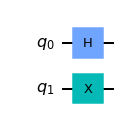

In [28]:
circ.draw('mpl')

In [29]:
backend = Aer.get_backend('statevector_simulator')
result = execute(circ,backend).result()
output = result.get_statevector(circ, decimals=3)

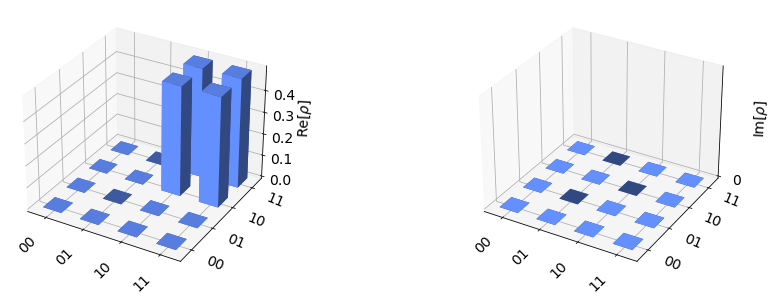

In [30]:
# Funcion que da todos los posibles valores de los qubits
#visualization.plot_state_city(output) Este comando, 
#sirve en los videos del curso pero no sirve aquí, tal ves la librería se actualizó, abajo puse el comaando que hace lo que debería el anterior
plot_state_city(output)